In [165]:
import sklearn
from sklearn.base import clone

In [166]:
print(sklearn.__version__)

0.19.1


In [167]:
from sklearn.datasets import load_wine

In [168]:
dataset = load_wine()

In [169]:
print(dataset.DESCR)

Wine Data Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- 1) Alcohol
 		- 2) Malic acid
 		- 3) Ash
		- 4) Alcalinity of ash  
 		- 5) Magnesium
		- 6) Total phenols
 		- 7) Flavanoids
 		- 8) Nonflavanoid phenols
 		- 9) Proanthocyanins
		- 10)Color intensity
 		- 11)Hue
 		- 12)OD280/OD315 of diluted wines
 		- 13)Proline
        	- class:
                - class_0
                - class_1
                - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash: 

In [170]:
dataset.target_names

array(['class_0', 'class_1', 'class_2'],
      dtype='<U7')

In [171]:
dataset.data.shape

(178, 13)

In [172]:
dataset.target.shape

(178,)

In [173]:
dataset.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [174]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [175]:
%matplotlib inline

In [176]:
wine_data = np.concatenate((dataset.data, dataset.target.reshape(-1, 1)), axis=-1)

In [177]:
columns = dataset.feature_names + ['class']

In [178]:
columns

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline',
 'class']

In [179]:
wine = pd.DataFrame(wine_data, columns=columns)

In [180]:
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [181]:
fig = plt.figure(figsize=(10, 8))
corrmat = wine.corr().sort_values(by='class', ascending=False)
corrmat

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
class,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717,1.000000
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
hue,-0.071747,-0.561296,-0.074667,-0.273955,0.055398,0.433681,0.543479,-0.262640,0.295544,-0.521813,1.000000,0.565468,0.236183,-0.617369


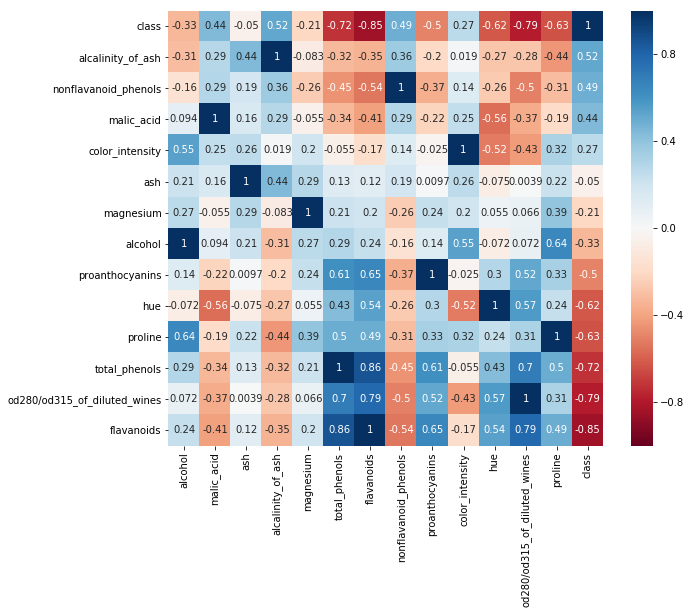

In [182]:
fig = plt.figure(figsize=(10, 8))
sns.heatmap(corrmat, vmin=-1, vmax=1, square=True, annot=True, cmap=plt.cm.RdBu)

In [183]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC

In [184]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [185]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, train_test_split, cross_val_score, GridSearchCV

In [186]:
y = wine['class']
X = wine.drop(['class'], axis=1)

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [188]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(142, 13) (142,)
(36, 13) (36,)


In [189]:
rf_param_grid = {'n_estimators': [10, 50, 100, 500], 'max_leaf_nodes': [5, 10, 50, 100]}

In [190]:
rfCV = GridSearchCV(RandomForestClassifier(), rf_param_grid, scoring='accuracy', n_jobs=-1, return_train_score=True)
rfCV.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [10, 50, 100, 500], 'max_leaf_nodes': [5, 10, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [191]:
print(rfCV.best_score_, rfCV.best_params_)

0.985915492958 {'n_estimators': 100, 'max_leaf_nodes': 50}


In [192]:
rf = RandomForestClassifier(n_estimators=50, max_leaf_nodes=50)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(accuracy_score(y_test, y_pred))

1.0


In [193]:
AdaBoostClassifier().get_params() 

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [194]:
ada_param_grid = {"learning_rate": [0.01, 0.1, 0.5, 1.0], "n_estimators": [10, 50, 100, 500]}

In [195]:
adaCV = GridSearchCV(AdaBoostClassifier(random_state=42), ada_param_grid, 'accuracy', n_jobs=-1, return_train_score=True)
adaCV.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=42),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.01, 0.1, 0.5, 1.0], 'n_estimators': [10, 50, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [196]:
print(adaCV.best_params_, adaCV.best_score_)

{'learning_rate': 0.01, 'n_estimators': 100} 0.915492957746


In [197]:
ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.01)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.916666666667


In [198]:
ada = AdaBoostClassifier(RandomForestClassifier(), n_estimators=100, learning_rate=0.01)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.944444444444


In [199]:
GradientBoostingClassifier().get_params()

{'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'presort': 'auto',
 'random_state': None,
 'subsample': 1.0,
 'verbose': 0,
 'warm_start': False}

In [200]:
gb_param_grid = {"learning_rate": [0.01, 0.1, 0.5, 0.1], "n_estimators": [10, 50, 100, 500], "max_leaf_nodes": [5, 10, 50, 100]}

In [201]:
gbCV = GridSearchCV(GradientBoostingClassifier(), gb_param_grid, scoring='accuracy', n_jobs=-1, return_train_score=True)
gbCV.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.01, 0.1, 0.5, 0.1], 'n_estimators': [10, 50, 100, 500], 'max_leaf_nodes': [5, 10, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [202]:
print(gbCV.best_params_, gbCV.best_score_)

{'learning_rate': 0.5, 'n_estimators': 10, 'max_leaf_nodes': 5} 0.964788732394


In [203]:
gb = GradientBoostingClassifier(learning_rate=0.5, n_estimators=10, max_leaf_nodes=5)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.944444444444


In [204]:
SVC().get_params()

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [205]:
svm_param_grid = {"C": [0.01, 0.1, 1.0, 10, 100], "gamma": [0.1, 0.5, 1, 5, 10], "kernel": ["linear", "rbf"]}
svmCV = GridSearchCV(SVC(random_state=42), svm_param_grid, "accuracy", n_jobs=-1, return_train_score=True)
svmCV.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'gamma': [0.1, 0.5, 1, 5, 10], 'kernel': ['linear', 'rbf'], 'C': [0.01, 0.1, 1.0, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [206]:
print(svmCV.best_params_, svmCV.best_score_)

{'gamma': 0.1, 'kernel': 'linear', 'C': 0.1} 0.943661971831


In [207]:
svm = SVC(C=0.1, gamma=0.1, kernel='linear', random_state=42, probability=True)
svm.fit(X_train, y_train)
y_test = svm.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.944444444444


In [208]:
svm.predict_proba(X_test).shape

(36, 3)

In [209]:
def get_oof(clf, X_train, y_train, X_test, n_folds=3):
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
    oof_train = np.zeros((X_train.shape[0],))
    oof_test = np.zeros((X_test.shape[0],))
    oof_test_kf = np.zeros((n_folds, X_test.shape[0],))
    for i, (train_index, val_index) in enumerate(kf.split(X_train)):
        trainX = X_train[train_index]
        trainY = y_train[train_index]
        valX = X_train[val_index]
        # 深拷贝，保留原来模型的参数
        clf_instance = clone(clf)
        clf_instance.fit(trainX, trainY)
        oof_train[val_index] = np.argmax(clf_instance.predict_proba(valX), axis=1)
        oof_test_kf[i, :] = np.argmax(clf_instance.predict_proba(X_test), axis=1)
    oof_test = oof_test_kf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

In [210]:
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values

In [211]:
rf_oof_train, rf_oof_test = get_oof(rf, X_train, y_train, X_test)
ada_oof_train, ada_oof_test = get_oof(ada, X_train, y_train, X_test)
gb_oof_train, gb_oof_test = get_oof(gb, X_train, y_train, X_test)
svm_oof_train, svm_oof_test = get_oof(svm, X_train, y_train, X_test)

In [212]:
rf_oof_train.shape, rf_oof_test.shape

((142, 1), (36, 1))

In [213]:
meta_X_train = np.concatenate((rf_oof_train, ada_oof_train, gb_oof_train, svm_oof_train), axis=1)
meta_X_test = np.concatenate((rf_oof_test, ada_oof_test, gb_oof_test, svm_oof_test), axis=1)

In [214]:
meta_rfCV = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, "accuracy", n_jobs=-1, return_train_score=True)
meta_rfCV.fit(meta_X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [10, 50, 100, 500], 'max_leaf_nodes': [5, 10, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [215]:
print(meta_rfCV.best_params_, meta_rfCV.best_score_)

{'n_estimators': 10, 'max_leaf_nodes': 5} 0.978873239437


In [217]:
meta_rf = RandomForestClassifier(n_estimators=10, max_leaf_nodes=5, random_state=42)
meta_rf.fit(meta_X_train, y_train)
y_pred = meta_rf.predict(meta_X_test)
print(accuracy_score(y_test, y_pred))

0.972222222222
